<a href="https://colab.research.google.com/github/kimyujin0/Machine-Learning_2022/blob/main/CH4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGDClassifier

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 훈련 세트와 테스트 세트 표준화 전처리
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [5]:
# 확률적 경사 하강법 제공하는 대표적인 분류용 클래스
from sklearn.linear_model import SGDClassifier

In [14]:
sc = SGDClassifier(loss = 'log', max_iter = 100, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))
# 반복 횟수 10이 부족한 것으로 판단하여 100으로 증가

0.8403361344537815
0.8


In [16]:
# 모델을 이어서 훈련
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))
# 에포크를 한 번 더 실행하니 정확도 향상

0.907563025210084
0.925


In [18]:
# 에포크를 사용해 훈련 반복하고 그래프로 확인하기
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes = np.unique(y_train)

In [23]:
# 300번의 에포크 동안 훈련 반복
for _ in range(0,300):
    sc.partial_fit(train_scaled, y_train, classes = classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

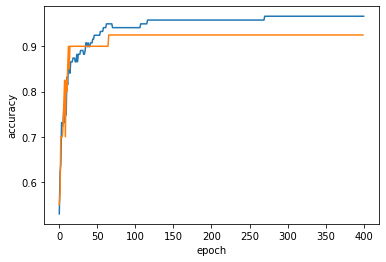

In [24]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 100번째 에포크가 적절한 반복 횟수

In [26]:
sc = SGDClassifier(loss='log', max_iter = 100, tol = None, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.957983193277311
0.925


In [27]:
# 힌지 손실로 확률적 경사 하강법
sc = SGDClassifier(loss='hinge', max_iter = 100, tol = None, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.9495798319327731
0.925
